In [1]:
import heeps
from heeps.wavefront.get_array import show_wf
from heeps.util.multiCPU import multiCPU
from astropy.io import fits
import os
from copy import deepcopy
import numpy as np
import proper.prop_get_amplitude as get_amp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir_output = os.path.normpath(os.path.expandvars('$HOME/heeps_metis/output_files/test_diam_norm/amp'))
dir_pupil = os.path.normpath(os.path.expandvars('$HOME/heeps_metis/input_files/pupil'))
pup_AG = fits.getdata(os.path.join(dir_pupil, 'eso/mask_allglass.fits'))
pup_M1 = fits.getdata(os.path.join(dir_pupil, 'eso/mask_fullM1.fits'))
pup_fullM1 = fits.getdata(os.path.join(dir_pupil, 'ELT_fullM1.fits'))
diam_dodecagon = 36.8765
diam_hexagon = 11.6081

In [3]:
def get_contrast(wf, diam_norm, verbose=False, **conf):
    conf['diam_norm'] = diam_norm
    wf1 = deepcopy(wf)
    wf1 = heeps.optics.apodizer(wf1, verbose=verbose, **conf)
    wf1 = heeps.optics.fp_mask(wf1, verbose=verbose, **conf)
    wf1 = heeps.optics.lyot_stop(wf1, verbose=verbose, **conf)
    contrast = np.sum(get_amp(wf1)**2)
    return contrast

# All-glass

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=2048, diam_norm=1.0838, beam_ratio=0.2572
   ravc_calc=True, ravc_t=0.7608, ravc_r=0.6213
   npupil=571, pscale=5.47 mas, lam=3.8045E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.83 lam/D)

Load pupil data from 'pup'


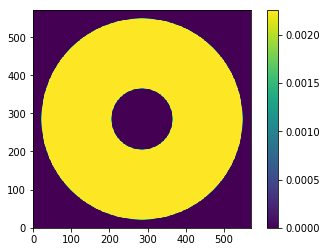

In [4]:
conf = dict(
    pup = pup_AG,
    spi_width = 0,
    ngrid = 2**11,
    f_lyot_stop = '',
    ls_dRext = 0,
    ls_dRint = 0,
    ls_dRspi = 0,
    ravc_calc = True,
    )
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf)
wf = heeps.pupil.pupil(verbose=True, **conf)
amp = show_wf(wf, dir_output + '_AG_pup', conf['npupil'], savefits=True)

   apply ring apodizer: ravc_t=0.7608, ravc_r=0.6213
   apply vortex phase mask
   apply Lyot stop: circ_ext=True, circ_int=True, ls_dRext=0.0000, ls_dRint=0.0000, ls_dRspi=0.0000


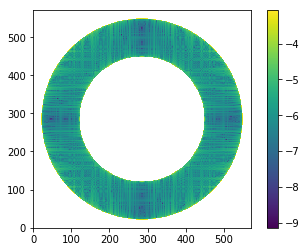

In [5]:
wf1 = deepcopy(wf)
wf1 = heeps.optics.apodizer(wf1, verbose=True, **conf)
wf1 = heeps.optics.fp_mask(wf1, verbose=True, **conf)
wf1 = heeps.optics.lyot_stop(wf1, verbose=True, **conf)
amp = show_wf(wf1, dir_output + '_AG_diam_img', conf['npupil'], log=True, savefits=True)

In [6]:
print('diam_norm = %.4f'%conf['diam_norm'])
del conf['diam_norm']
diam_norms = np.linspace(.96, 1.1, 8)
contrast = multiCPU(get_contrast, posargs=[wf], posvars=[diam_norms], 
    kwargs=conf)

diam_norm = 1.0838
   2022-03-28 12:16:01, using 56 cores
   2022-03-28 12:16:35, completed in 33.74 seconds


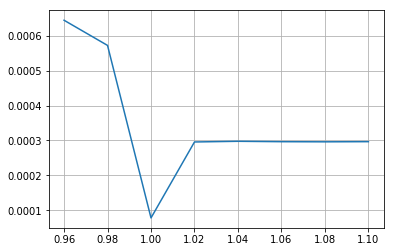

In [7]:
plt.plot(diam_norms, contrast)
plt.grid(True);

# M1 (no spider, no segment)

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=2048, diam_norm=1.0847, beam_ratio=0.2570
   ravc_calc=True, ravc_t=0.7513, ravc_r=0.6312
   npupil=571, pscale=5.47 mas, lam=3.8045E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.79 lam/D)

Load pupil data from 'pup'


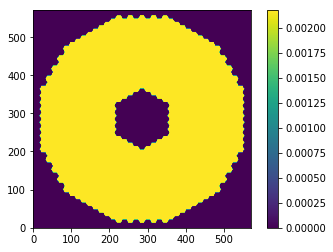

In [8]:
conf = dict(
    pup = pup_M1,
    spi_width = 0,
    ngrid = 2**11,
    f_lyot_stop = '',
    ls_dRext = 0,
    ls_dRint = 0,
    ls_dRspi = 0,
    ls_ext_circ = False,
    ravc_calc = True,
    diam_ext = diam_dodecagon,
    diam_int = diam_hexagon,
    )
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf)
wf = heeps.pupil.pupil(verbose=True, **conf)
amp = show_wf(wf, dir_output + '_M1_pup', conf['npupil'], savefits=True)

   apply ring apodizer: ravc_t=0.7513, ravc_r=0.6312
   apply vortex phase mask
   apply Lyot stop: circ_ext=False, circ_int=True, ls_dRext=0.0000, ls_dRint=0.0000, ls_dRspi=0.0000


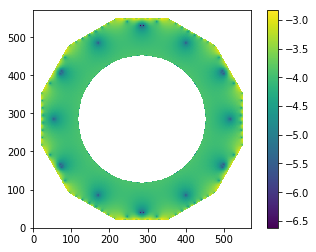

In [9]:
wf1 = deepcopy(wf)
wf1 = heeps.optics.apodizer(wf1, verbose=True, **conf)
wf1 = heeps.optics.fp_mask(wf1, verbose=True, **conf)
wf1 = heeps.optics.lyot_stop(wf1, verbose=True, **conf)
amp = show_wf(wf1, dir_output + '_M1_diam_img', conf['npupil'], log=True, savefits=True)

In [10]:
print('diam_norm = %.4f'%conf['diam_norm'])
del conf['diam_norm']
diam_norms = np.linspace(.96, 1.1, 8)
contrast = multiCPU(get_contrast, posargs=[wf], posvars=[diam_norms], 
    kwargs=conf)

diam_norm = 1.0847
   2022-03-28 12:17:17, using 56 cores
   2022-03-28 12:17:47, completed in 30.37 seconds


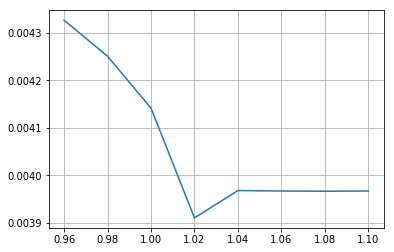

In [11]:
plt.plot(diam_norms, contrast)
plt.grid(True);

# Full M1

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=2048, diam_norm=1.0847, beam_ratio=0.2570
   ravc_calc=True, ravc_t=0.7513, ravc_r=0.6312
   npupil=571, pscale=5.47 mas, lam=3.8045E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.79 lam/D)

Load pupil data from 'pup'


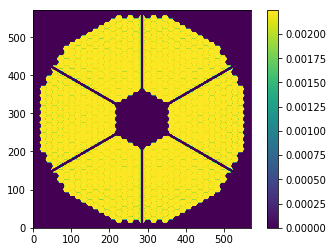

In [12]:
conf = dict(
    pup = pup_fullM1,
    ngrid = 2**11,
    f_lyot_stop = '',
    ls_dRext = 0,
    ls_dRint = 0,
    ls_dRspi = 0,
    ls_ext_circ = False,
    ravc_calc = True,
    diam_ext = diam_dodecagon,
    diam_int = diam_hexagon,
    )
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf)
wf = heeps.pupil.pupil(verbose=True, **conf)
amp = show_wf(wf, dir_output + '_fullM1_pup', conf['npupil'], savefits=True)

   apply ring apodizer: ravc_t=0.7513, ravc_r=0.6312
   apply vortex phase mask
   apply Lyot stop: circ_ext=False, circ_int=True, ls_dRext=0.0000, ls_dRint=0.0000, ls_dRspi=0.0000


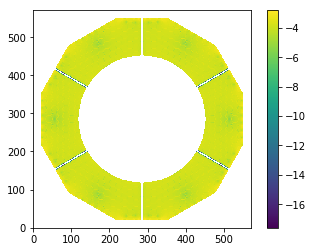

In [13]:
wf1 = deepcopy(wf)
wf1 = heeps.optics.apodizer(wf1, verbose=True, **conf)
wf1 = heeps.optics.fp_mask(wf1, verbose=True, **conf)
wf1 = heeps.optics.lyot_stop(wf1, verbose=True, **conf)
amp = show_wf(wf1, dir_output + '_fullM1_diam_img', conf['npupil'], log=True, savefits=True)

In [14]:
print('diam_norm = %.4f'%conf['diam_norm'])
del conf['diam_norm']
diam_norms = np.linspace(.99, 1.05, 13)
contrast = multiCPU(get_contrast, posargs=[wf], posvars=[diam_norms], 
    kwargs=conf)

diam_norm = 1.0847
   2022-03-28 12:17:57, using 56 cores
   2022-03-28 12:22:47, completed in 289.94 seconds


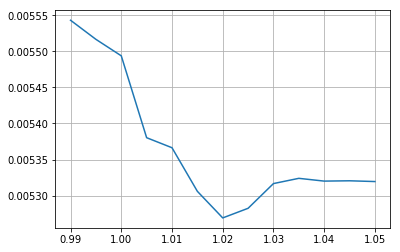

In [15]:
plt.plot(diam_norms, contrast)
plt.grid(True);